# Background

This notebook will be exploring the viability of the dataset for use in ML through KNN, LR, & SVM. The reference for this ML Test is found in this [GitHub link](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb).

# Importing Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.model_selection as model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import svm

timers = []

# Importing Datasets

Note that these datasets that are being used are the ones already pre-processed by the notebook: `[Datasets] - Thesis Notebook.ipynb`

## 0. Reference APIs

For use later when transforming data from string APIs to numeric form to be compatible for use in ML training.

In [2]:
def getAPIs():
    apis = pd.read_csv('CombinedAPIs.csv', low_memory=False)
    apis = apis['api'].to_list()
    apis.append('nan') #Take note of this
    return apis

apis = getAPIs()

## 1. MalbehavD Dataset

In [3]:
malbehavd = pd.read_csv('MalbehavD-V1.csv', low_memory=False)
malbehavd.head()

,sha256,malware,0,1,2,3,4,5,6,7,...,165,166,167,168,169,170,171,172,173,174
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Catak Dataset

In [4]:
catak = pd.read_csv('Catak.csv', low_memory=False)
catak.head()

,malware_type,malware,0,1,2,3,4,5,6,7,...,156,157,158,159,160,161,162,163,164,165
0,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Trojan,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Backdoor,1,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Backdoor,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Oliveira Dataset

In [5]:
oliveira = pd.read_csv('Oliveira.csv', low_memory=False)
oliveira.head()

,hash,malware,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,071e8c3f8922e186e57548cd4c703a5d,1,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,33f8e6d08a6aae939f25a8e0d63dd523,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,b68abd064e975e1c6d5f25e748663076,1,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,72049be7bd30ea61297ea624ae198067,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,c9b3700a77facf29172f32df6bc77f48,1,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


# ML Proper

### ML Algorithms used:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression (LR)
3. Decision Tree (DT/DTC)
4. Support Vector Machine (SVM)*
5. Random Forest (RF)*
6. Gaussian Naive Bayes (GNB)*
7. AdaBoost*
8. Multi-layer Perceptron (MLP)*

*Newly Implemented

AdaBoost, despite being a boosted model like XGBoost and LGBM, is actually an old boosted model, being created way back in 1995. For reference here is the summary table of the different known boosted ML algorithms:

| Algorithm                      | AdaBoost                    | XGBoost                     | CatBoost                                    | LightGBM                    |
|--------------------------------|-----------------------------|-----------------------------|---------------------------------------------|-----------------------------|
| Year                           | 1995                        | 2014                        | 2017                                        | 2017                        |
| Handling Categorical Variables | No (Conversion is required) | No (Conversion is required) | Automatically handles categorical variables | No (Conversion is required) |
| Memory Usage                   | Low                         | Moderate                    | High                                        | Low                         |
| Parallel Processing            | No                          | Yes                         | Yes                                         | Yes                         |
| GPU Support                    | No                          | Yes                         | Yes                                         | Yes                         |
| Regularization                 | No                          | Yes                         | Yes                                         | Yes                         |
| Speed/Scalability              | Fast                        | Fast                        | Moderate                                    | Fast                        |

### Reference:
- [Boosted Algorithms](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/)
- [SciKit Learn](https://scikit-learn.org/stable/supervised_learning.html)

## 1. Determine features

Determine what features, or for our case, behaviors are associated in each ith API call of the executable.

### 1.1 Preview Features

In [6]:
malbehavd_feats = []
for i in range(malbehavd.shape[1]-2):
    malbehavd_feats.append(str(i))
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileVersionInfoSizeW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,NtQueryValueKey,RegCloseKey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,RegQueryValueExW,NtMapViewOfSection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,NtQueryAttributesFile,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
catak_feats = []
for i in range(catak.shape[1]-2):
    catak_feats.append(str(i))
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,LdrLoadDll,GetSystemInfo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,NtCreateFile,SetFilePointer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,RegSetValueExA,NtCreateFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
oliveira_feats = []
for i in range(oliveira.shape[1]-2):
    oliveira_feats.append(str(i))
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,NtLoadKey,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


### 1.2 Converting string features to int features

The technique to be used here will be LabelEncoder.

Basically what it does it converts string API calls to numeric equivalent.

This however means that the deployed model will require on the 'transformed' values as per the APIs listed in the `CombinedAPIs.csv` with an included `'nan'` value which is referred to in the notebook as `apis`.

#### 1.2.1 Preparing LabelEncoder

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(apis)

LabelEncoder()

#### 1.2.2 MalbehavD

In [10]:
for f in malbehavd_feats:
    malbehavd[f] = pd.Series(le.fit_transform(malbehavd[f]))
X = malbehavd[malbehavd_feats]
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,26,2,65,52,29,31,44,37,63,31,...,1,1,1,1,1,1,1,1,1,1
1,35,19,65,9,78,92,46,1,85,98,...,1,1,1,1,1,1,1,1,1,1
2,14,7,26,35,34,77,94,22,105,73,...,1,1,1,1,1,1,1,1,1,1
3,39,31,35,95,66,43,85,54,62,48,...,1,1,1,1,1,1,1,1,1,1
4,26,23,60,94,104,83,56,53,81,48,...,1,1,1,1,1,1,1,1,1,1


#### 1.2.3 Catak

In [11]:
for f in catak_feats:
    catak[f] = pd.Series(le.fit_transform(catak[f]))
X = catak[catak_feats]
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
1,19,39,54,41,45,118,67,54,46,38,...,6,3,4,3,2,2,2,2,1,1
2,25,32,22,2,99,109,106,96,57,121,...,6,3,4,3,2,2,2,2,1,1
3,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
4,27,32,106,55,99,101,106,4,108,63,...,6,3,4,3,2,2,2,2,1,1


#### 1.2.4 Oliveira

In [12]:
for f in oliveira_feats:
    oliveira[f] = pd.Series(le.fit_transform(oliveira[f]))
X = oliveira[oliveira_feats]
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,36,74,54,68,108,71,91,123,32,88,...,73,41,177,83,103,126,23,128,34,40
1,22,54,62,65,71,54,75,52,76,53,...,35,49,143,72,42,174,85,110,135,23
2,3,32,75,43,92,54,97,52,96,53,...,77,39,72,77,39,68,79,41,73,69
3,22,54,62,65,71,54,75,52,76,53,...,129,122,180,126,182,109,128,185,141,177
4,22,63,42,74,51,98,56,96,55,76,...,26,123,153,26,125,152,88,159,90,152


## 2. Determine labels

Determine what are the different labels that the combined features will result into. For this case, it will be either malicious (1) or not malicious (0).

In [13]:
y = malbehavd['malware'].to_numpy()
labels = malbehavd['malware'].unique()
print("MalbehavD - No. of unique labels: ", labels.size)
print(labels)

MalbehavD - No. of unique labels:  2
[0 1]


In [14]:
y = catak['malware'].to_numpy()
labels = catak['malware'].unique()
print("Catak - No. of unique labels: ", labels.size)
print(labels)

Catak - No. of unique labels:  1
[1]


In [15]:
y = oliveira['malware'].to_numpy()
labels = oliveira['malware'].unique()
print("Oliviera - No. of unique labels: ", labels.size)
print(labels)

Oliviera - No. of unique labels:  2
[1 0]


## 3. Dataset Selector
To automate the selection process as suppose to hard-coding changes, a dataset selector is made.

Simply change the input parameter for the `dataset_selector(dataset:int)`. The choices are:
- 0 - MalbehavD
- 1 - Catak
- 2 - Oliveira

In [16]:
def dataset_selector(dataset:int):
    if dataset == 0:
        return malbehavd[malbehavd_feats], malbehavd['malware'].to_numpy()
    elif dataset == 1:
        return catak[catak_feats], catak['malware'].to_numpy()
    elif dataset == 2:
        return oliveira[oliveira_feats], oliveira['malware'].to_numpy()
X, y = dataset_selector(2)

## 3. Divide Training Data from Test Data

Divide the dataset into training and test data. For this test, it will be divided into 80:20 for train:test respectively.

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20, random_state=1)

In [18]:
cr = [] #Classification reports list; Entries as ['algo_label',algo_cr]
cm = [] #Confusion matrices list; Entries as ['algo_label', algo_cf]

## 4. K-Nearest Neighbors

### 4.1 Load and 'Train' K Neighbors Classifier Model

In [19]:
knn = KNeighborsClassifier() #default: neighbors = 5, p = 2, leaf size = 30
startTime = time.time()
knn.fit(X,y)
timers.append(["KNN Default: ", time.time()-startTime])

### 4.2. Test Predictions

In [20]:
y_pred = knn.predict(X_test)

### 4.3 Create Classifier Report

In [21]:
knn_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['KNN', knn_cr])

### 4.4 K-NN Confusion Matrix

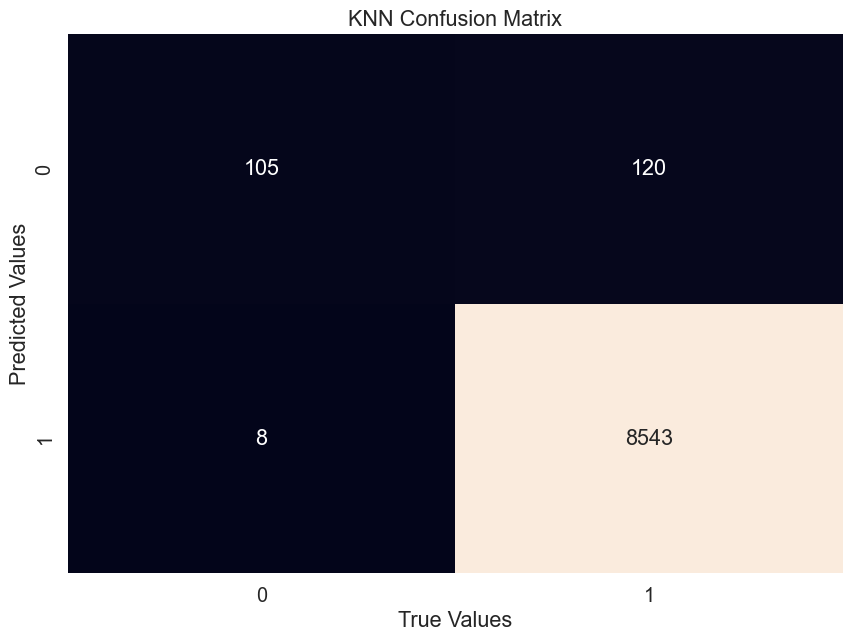

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
knn_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['KNN', knn_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 5. Decision Trees Classifier (DTC)

### 5.1. Load and 'Train' Decision Tree Classifier Model

In [23]:
dtc = DecisionTreeClassifier() #default: no max depth
startTime = time.time()
dtc.fit(X,y)
timers.append(["DTC Default: ", time.time()-startTime])

### 5.2. Plot Decision Tree

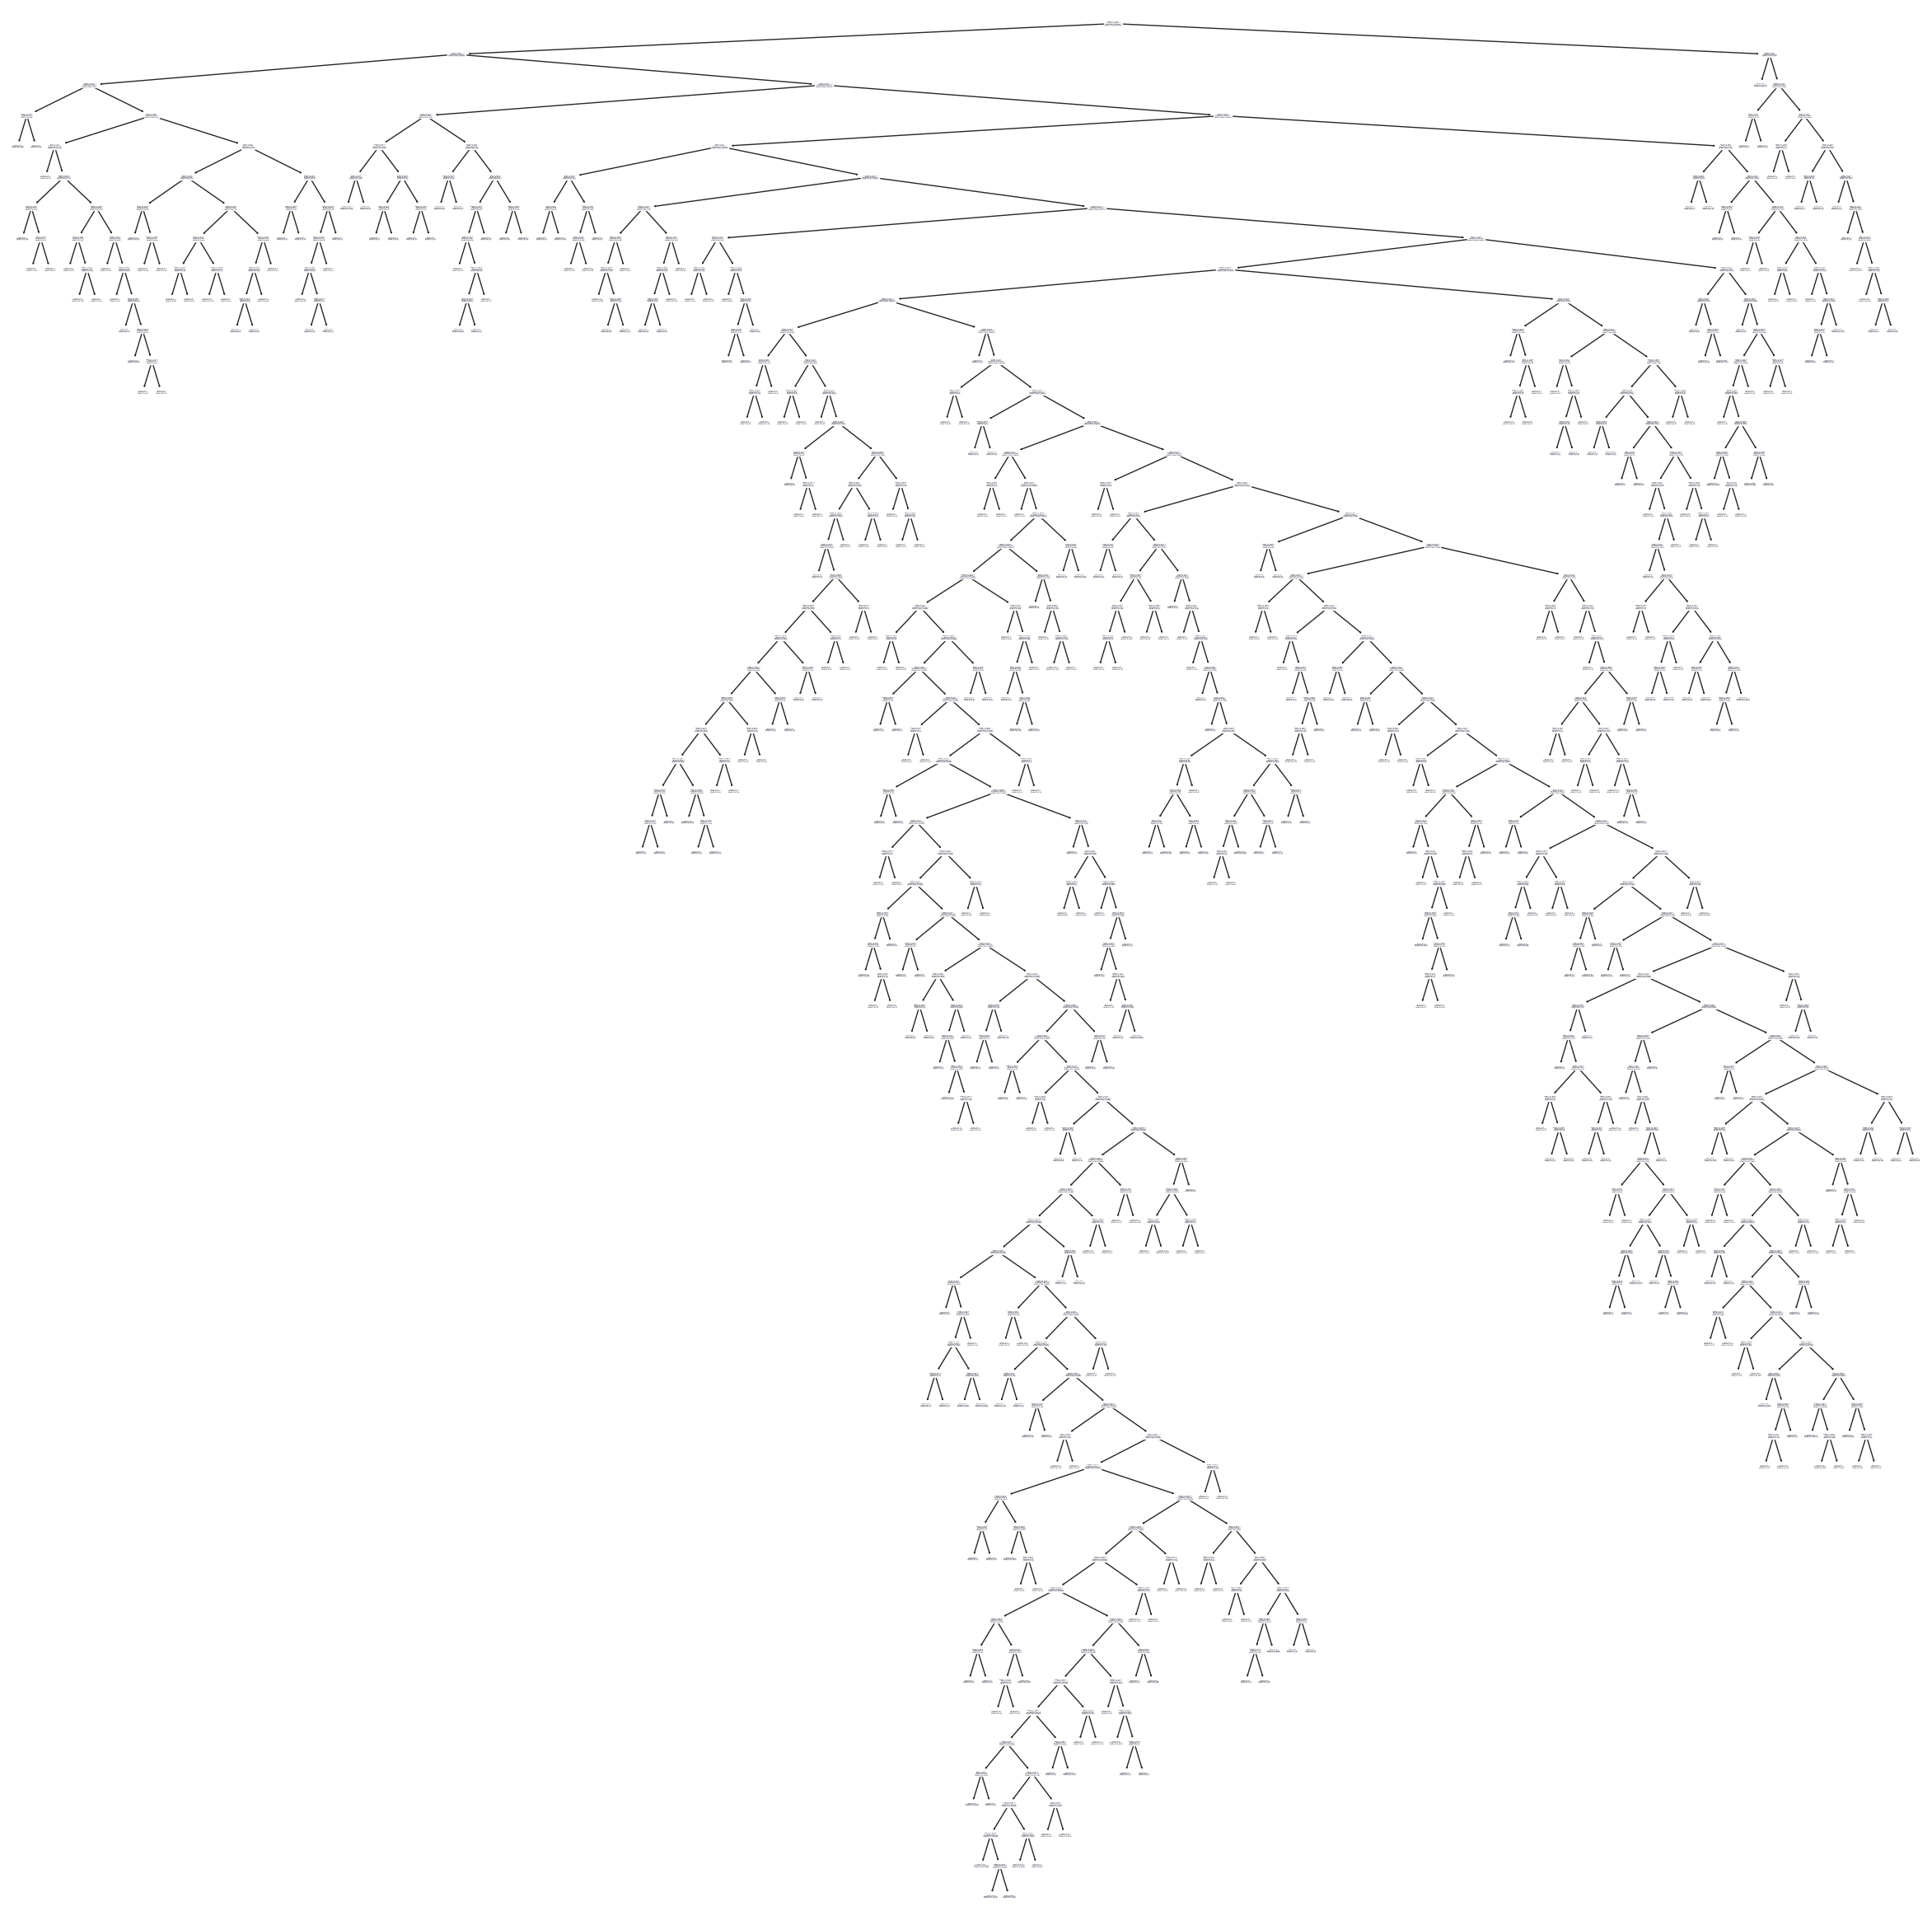

In [24]:
plt.figure(figsize=(30, 30))
plot_tree(dtc)
plt.show()

### 5.3. Test Predictions

In [25]:
y_pred = dtc.predict(X_test)

### 5.4. Create Classifier Report

In [26]:
dtc_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['DTC', dtc_cr])

### 5.5. DTC Confusion Matrix

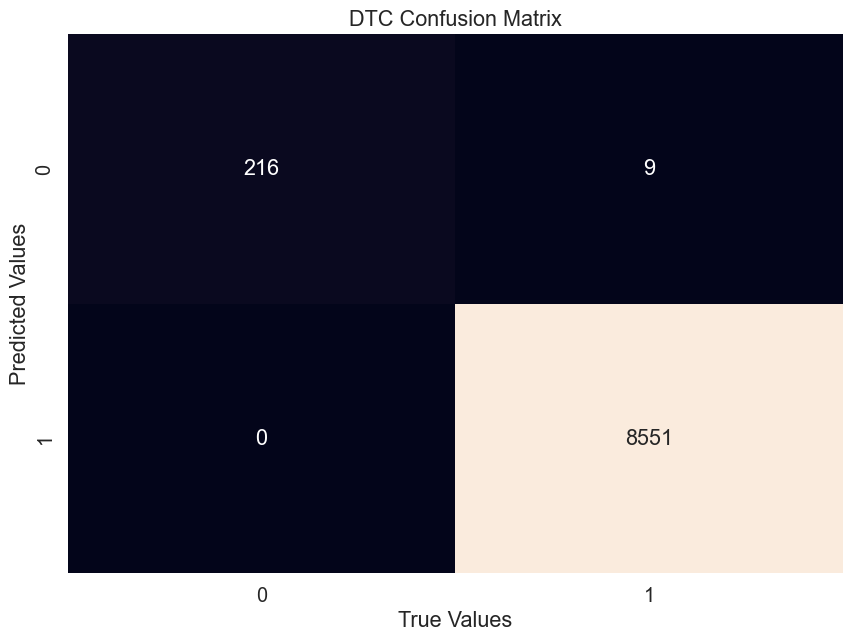

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
dtc_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['DTC', dtc_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("DTC Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 6. Logistic Regression

### 6.1. Load and 'Train' Logistic Regression Classifier Model

In [28]:
lr_model = LogisticRegression(penalty=None, verbose=True, n_jobs=-1, random_state=1, max_iter=10000) #default: solver = lbfgs
startTime = time.time()
lr_model.fit(X, y)
timers.append(["LR Default: ", time.time()-startTime])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.6s finished


### 6.2. Test Predictions

In [29]:
y_pred = lr_model.predict(X_test)

### 6.3. Create Classification Report

In [30]:
lr_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['LR', lr_cr])

### 6.4. LR Confusion Matrix

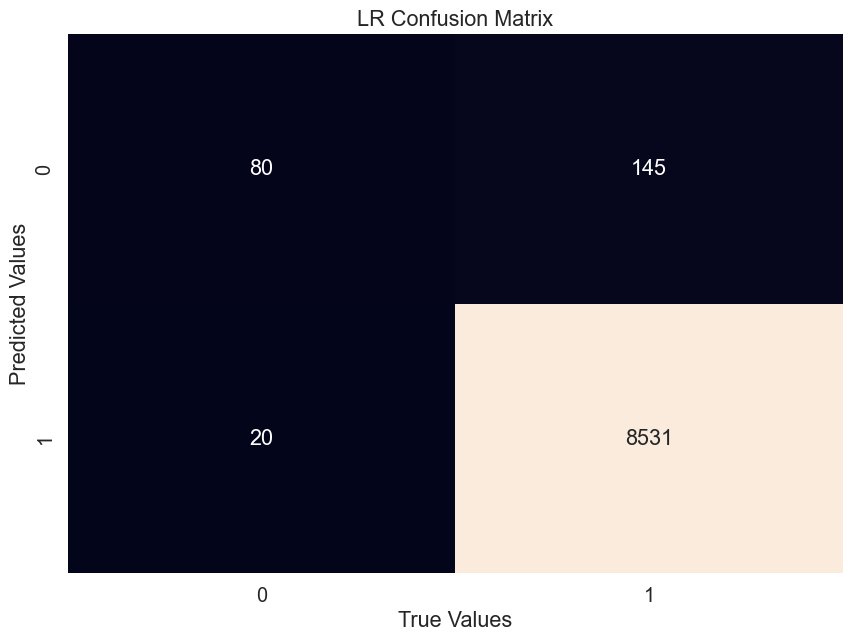

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
lr_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['LR', lr_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("LR Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 7. Support Vector Machine (SVM)*

### 7.1. Load and 'Train' SVM Classifier Model
Reference: https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html

In [32]:
from sklearn.svm import LinearSVC as SVM
from sklearn.datasets import make_classification

svm_model = SVM(verbose=True)
startTime = time.time()
svm_model.fit(X, y)
timers.append(["SVM Default: ", time.time()-startTime])

[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 7.2. Test Predictions

In [33]:
y_pred = svm_model.predict(X_test)

### 7.3. Create Classification Report

In [34]:
svm_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['SVM', svm_cr])

### 7.4. SVM Confusion Matrix

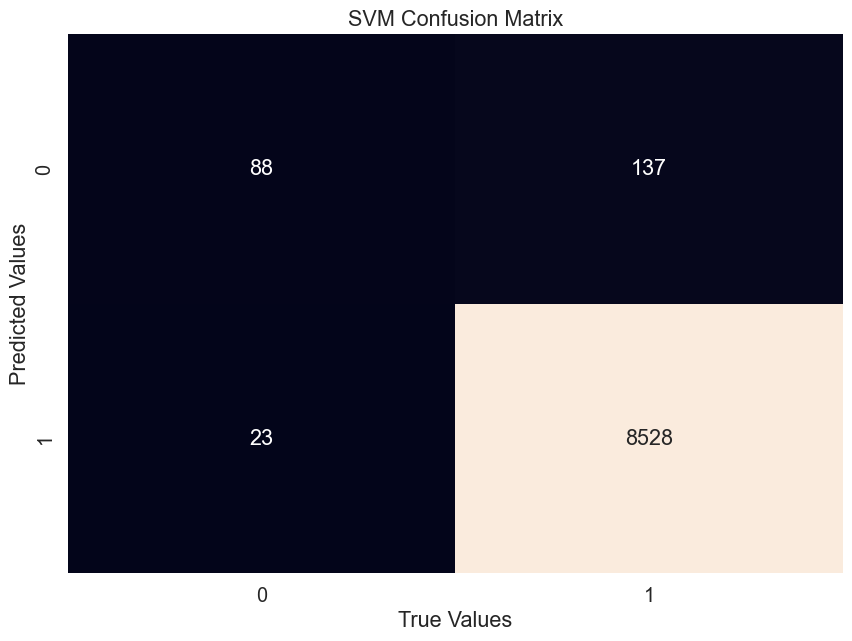

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
svm_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['SVM', svm_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("SVM Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 8. Random Forest*

### 8.1. Load and 'Train' RF Classifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier as RF

rf_model = RF(verbose=True)
startTime = time.time()
rf_model.fit(X, y)
timers.append(["RF Default: ", time.time()-startTime])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.3s finished


### 8.2. Test Predictions

In [37]:
y_pred = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### 8.3. Create Classification Report

In [38]:
rf_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['RF', rf_cr])

### 8.4. RF Confusion Matrix

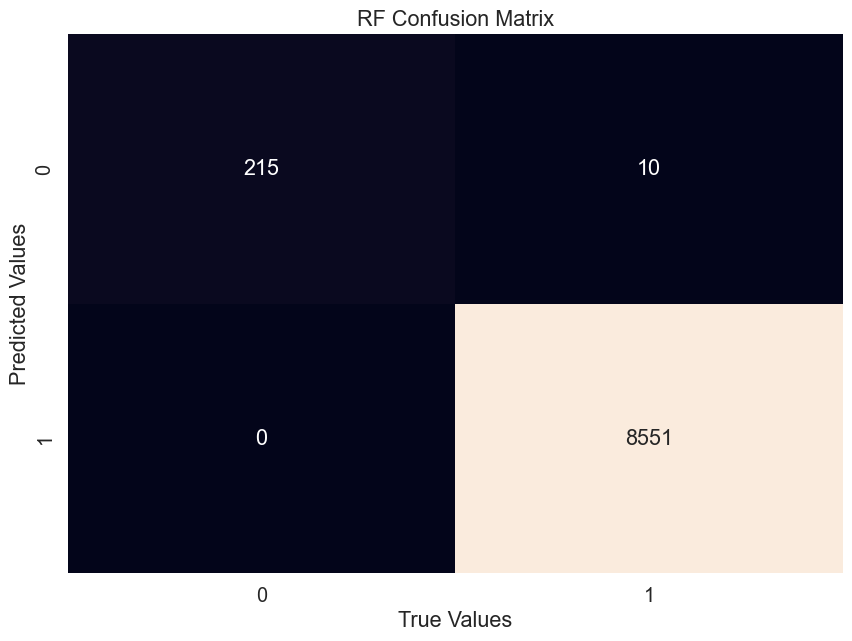

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
rf_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['RF', rf_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("RF Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 9. GNB*

### 9.1. Load and 'Train' GNB Classifier Model

In [40]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb_model = GNB()
startTime = time.time()
gnb_model.fit(X, y)
timers.append(["GNB Default: ", time.time()-startTime])

### 9.2. Test Predictions

In [41]:
y_pred = gnb_model.predict(X_test)

### 9.3. Create Classification Report

In [42]:
gnb_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['GNB', gnb_cr])

### 9.4. GNB Confusion Matrix

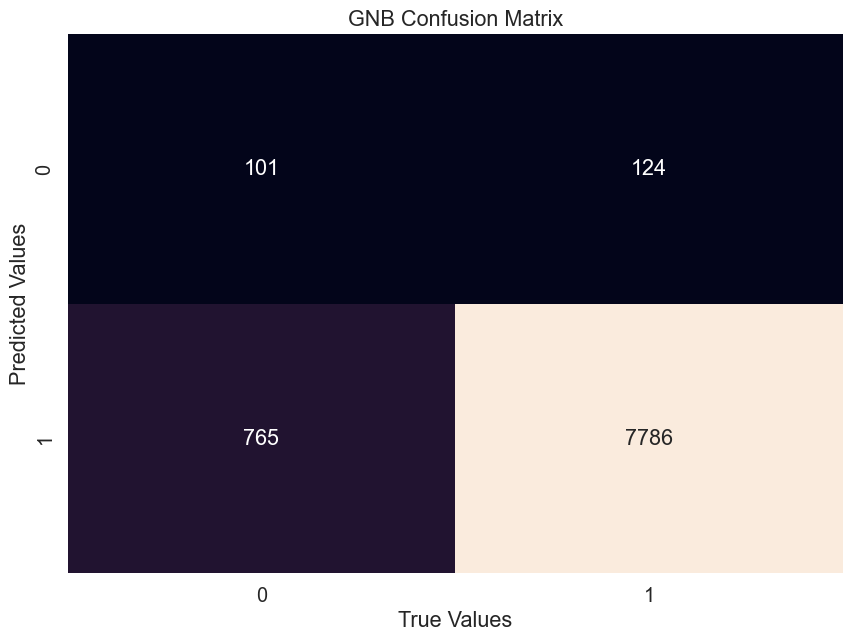

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
gnb_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['GNB', gnb_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("GNB Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 10. AdaBoost*

### 10.1. Load and 'Train' AdaBoost Classifier Model

In [44]:
from sklearn.ensemble import AdaBoostClassifier as ADA

ada_model = ADA()
startTime = time.time()
ada_model.fit(X, y)
timers.append(["AdaBoost Default: ", time.time()-startTime])

### 10.2. Test Predictions

In [45]:
y_pred = ada_model.predict(X_test)

### 10.3. Create Classification Report

In [46]:
ada_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['AdaBoost', ada_cr])

### 10.4. AdaBoost Confusion Matrix

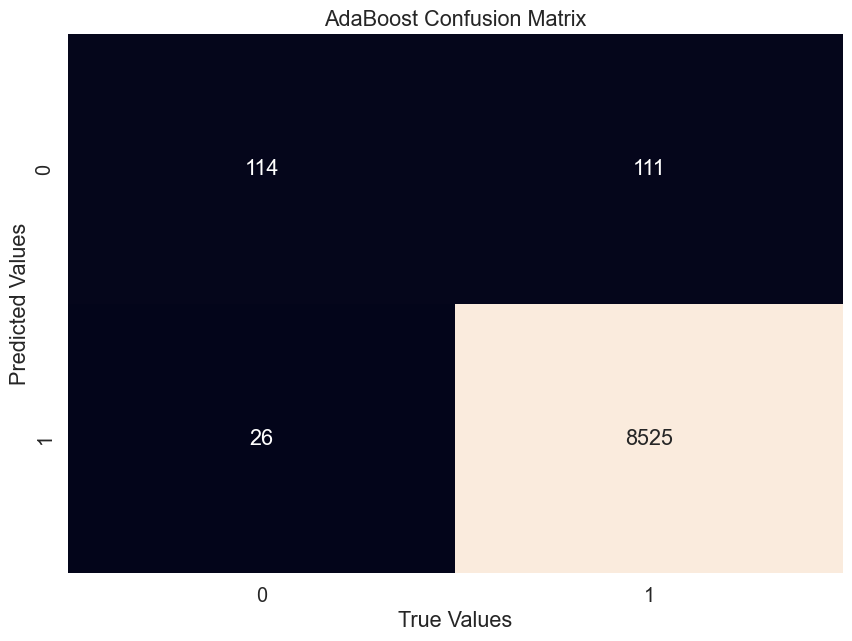

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
ada_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['AdaBoost', ada_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 11. MLP*

*Sort of a Neural Network like ML model.*

### 11.1. Load and 'Train' MLP Classifier Model

In [48]:
from sklearn.neural_network import MLPClassifier as MLP

mlp_model = MLP(verbose=True)
startTime = time.time()
mlp_model.fit(X, y)
timers.append(["MLP Default: ", time.time()-startTime])

Iteration 1, loss = 0.79515930
Iteration 2, loss = 0.38463046
Iteration 3, loss = 0.25625414
Iteration 4, loss = 0.19584626
Iteration 5, loss = 0.16754240
Iteration 6, loss = 0.13405827
Iteration 7, loss = 0.19229321
Iteration 8, loss = 0.13565601
Iteration 9, loss = 0.23002444
Iteration 10, loss = 0.12140898
Iteration 11, loss = 0.09283833
Iteration 12, loss = 0.08132500
Iteration 13, loss = 0.14713639
Iteration 14, loss = 0.12178642
Iteration 15, loss = 0.07376985
Iteration 16, loss = 0.07884347
Iteration 17, loss = 0.06580709
Iteration 18, loss = 0.07047785
Iteration 19, loss = 0.11659555
Iteration 20, loss = 0.06648734
Iteration 21, loss = 0.06431224
Iteration 22, loss = 0.08746752
Iteration 23, loss = 0.06603264
Iteration 24, loss = 0.10200731
Iteration 25, loss = 0.09355709
Iteration 26, loss = 0.06286152
Iteration 27, loss = 0.06216242
Iteration 28, loss = 0.06234955
Iteration 29, loss = 0.05224183
Iteration 30, loss = 0.04691305
Iteration 31, loss = 0.04849772
Iteration 32, los

### 11.2. Test Predictions

In [49]:
y_pred = mlp_model.predict(X_test)

### 11.3. Create Classification Report

In [50]:
mlp_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['MLP', mlp_cr])

### 11.4. AdaBoost Confusion Matrix

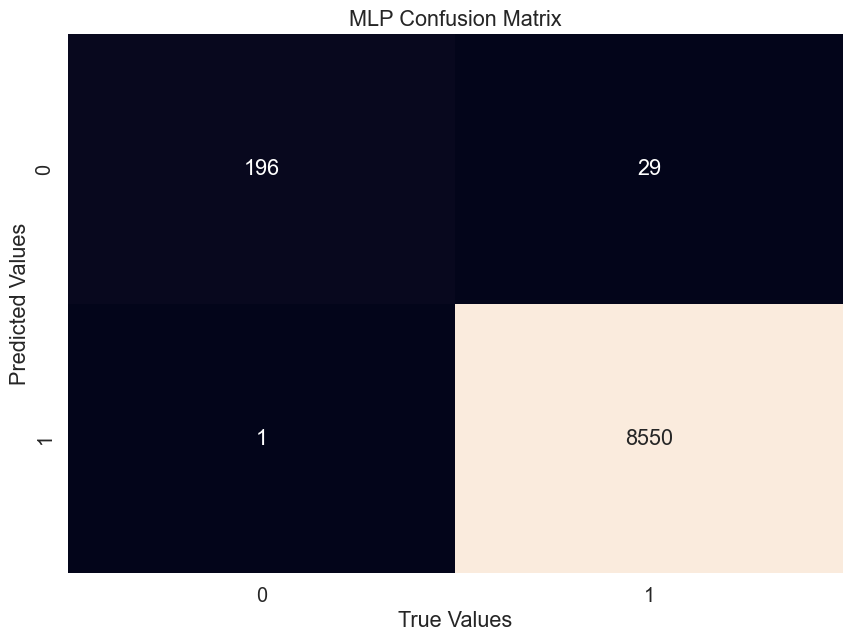

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
mlp_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['MLP', mlp_conf_matrix])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("MLP Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 7. Comparison of Machine Learning Models

### 7.1 Using SkLearn's Classifier Report

In [52]:
for report in cr:
    print(report[0],"\n",report[1])

KNN 
               precision    recall  f1-score   support

           0     0.9292    0.4667    0.6213       225
           1     0.9861    0.9991    0.9926      8551

    accuracy                         0.9854      8776
   macro avg     0.9577    0.7329    0.8069      8776
weighted avg     0.9847    0.9854    0.9830      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8000    0.3556    0.4923       225
           1     0.9833    0.9977    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8916    0.6766    0.7414      8776
weighted avg     0.9786    0.9812    0.9777      8776

SV

### 7.2. Using Confusion Matrix

In [53]:
for matrix in cm:
    print(matrix[0],"\n",matrix[1])

KNN 
               precision    recall  f1-score   support

           0     0.9292    0.4667    0.6213       225
           1     0.9861    0.9991    0.9926      8551

    accuracy                         0.9854      8776
   macro avg     0.9577    0.7329    0.8069      8776
weighted avg     0.9847    0.9854    0.9830      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8000    0.3556    0.4923       225
           1     0.9833    0.9977    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8916    0.6766    0.7414      8776
weighted avg     0.9786    0.9812    0.9777      8776

SV

### 7.3. Using K-Folds Cross Validation comparision for ML Algorithms

In [54]:
#Default parameters only
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lr_model = LogisticRegression(penalty=None, verbose=True, n_jobs=-1)

# kf will return list of indices for the train_index and test_index
kfold_results = []
for i, (train_index, test_index) in enumerate(kf.split(malbehavd)):
    sublist = [i]
    axis = 0 
    
    # Extract from the dataframe based on the given indeces
    training_set = np.take(X, train_index, axis)
    training_set_labels = np.take(y, train_index, axis)
    test_set = np.take(X, test_index, axis)
    test_set_labels = np.take(y, test_index, axis)

    knn.fit(training_set,training_set_labels)
    knn_pred = knn.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, knn_pred),4))
    
    dtc.fit(training_set,training_set_labels)
    dtc_pred = dtc.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, dtc_pred),4))
    
    lr_model.fit(training_set,training_set_labels)
    lr_pred = lr_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, lr_pred),4))
    
    svm_model.fit(training_set,training_set_labels)
    svm_pred = svm_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, svm_pred),4))
    
    rf_model.fit(training_set,training_set_labels)
    rf_pred = rf_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, rf_pred),4))
    
    gnb_model.fit(training_set,training_set_labels)
    gnb_pred = gnb_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, gnb_pred),4))
    
    ada_model.fit(training_set,training_set_labels)
    ada_pred = ada_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, ada_pred),4))
    
    mlp_model.fit(training_set,training_set_labels)
    mlp_pred = mlp_model.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, mlp_pred),4))
    
    kfold_results.append(sublist)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 0.89426435
Iteration 2, loss = 0.68954352
Iteration 3, loss = 0.48363524
Iteration 4, loss = 0.47644193
Iteration 5, loss = 0.49553030
Iteration 6, loss = 0.43175029
Iteration 7, loss = 0.42876795
Iteration 8, loss = 0.36341406
Iteration 9, loss = 0.29281731
Iteration 10, loss = 0.27796937
Iteration 11, loss = 0.23302477
Iteration 12, loss = 0.19722564
Iteration 13, loss = 0.17977716
Iteration 14, loss = 0.48504838
Iteration 15, loss = 0.52857808
Iteration 16, loss = 0.33696046
Iteration 17, loss = 0.18426059
Iteration 18, loss = 0.11670348
Iteration 19, loss = 0.09967378
Iteration 20, loss = 0.10395564
Iteration 21, loss = 0.07025556
Iteration 22, loss = 0.06701680
Iteration 23, loss = 0.06133371
Iteration 24, loss = 0.09236012
Iteration 25, loss = 0.06424397
Iteration 26, loss = 0.02966395
Iteration 27, loss = 0.02444400
Iteration 28, loss = 0.01872774
Iteration 29, loss = 0.01736489
Iteration 30, loss = 0.02885701
Iteration 31, loss = 0.02128092
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 0.95207388
Iteration 2, loss = 0.60299461
Iteration 3, loss = 0.56892826
Iteration 4, loss = 0.47357626
Iteration 5, loss = 0.38622851
Iteration 6, loss = 0.35736012
Iteration 7, loss = 0.30288943
Iteration 8, loss = 0.32988426
Iteration 9, loss = 0.25851268
Iteration 10, loss = 0.21690679
Iteration 11, loss = 0.18510149
Iteration 12, loss = 0.14967256
Iteration 13, loss = 0.18593981
Iteration 14, loss = 0.14813568
Iteration 15, loss = 0.14955713
Iteration 16, loss = 0.12116342
Iteration 17, loss = 0.11137455
Iteration 18, loss = 0.10228718
Iteration 19, loss = 0.08407140
Iteration 20, loss = 0.04781829
Iteration 21, loss = 0.05346942
Iteration 22, loss = 0.03838243
Iteration 23, loss = 0.05136870
Iteration 24, loss = 0.02506555
Iteration 25, loss = 0.03581564
Iteration 26, loss = 0.04054862
Iteration 27, loss = 0.01968208
Iteration 28, loss = 0.01663482
Iteration 29, loss = 0.04760062
Iteration 30, loss = 0.02335800
Iteration 31, loss = 0.01216517
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 15.53539585
Iteration 2, loss = 0.82592918
Iteration 3, loss = 0.82592893
Iteration 4, loss = 0.82592862
Iteration 5, loss = 0.82592831
Iteration 6, loss = 0.82592800
Iteration 7, loss = 0.82592772
Iteration 8, loss = 0.82592747
Iteration 9, loss = 0.77634857
Iteration 10, loss = 0.62129423
Iteration 11, loss = 0.56339754
Iteration 12, loss = 0.48881652
Iteration 13, loss = 0.50695384
Iteration 14, loss = 0.49196318
Iteration 15, loss = 0.49057752
Iteration 16, loss = 0.49981442
Iteration 17, loss = 0.46087377
Iteration 18, loss = 0.46209041
Iteration 19, loss = 0.44475283
Iteration 20, loss = 0.44061975
Iteration 21, loss = 0.42197518
Iteration 22, loss = 0.41850562
Iteration 23, loss = 0.38448889
Iteration 24, loss = 0.36296543
Iteration 25, loss = 0.35845157
Iteration 26, loss = 0.36120491
Iteration 27, loss = 0.32302147
Iteration 28, loss = 0.30235045
Iteration 29, loss = 0.29329845
Iteration 30, loss = 0.27662732
Iteration 31, loss = 0.26895123
Iteration 32, lo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 0.98488159
Iteration 2, loss = 0.70473490
Iteration 3, loss = 0.56446762
Iteration 4, loss = 0.47304650
Iteration 5, loss = 0.39172490
Iteration 6, loss = 0.32468958
Iteration 7, loss = 0.27211874
Iteration 8, loss = 0.24849902
Iteration 9, loss = 0.21707383
Iteration 10, loss = 0.17736690
Iteration 11, loss = 0.15884319
Iteration 12, loss = 0.13707213
Iteration 13, loss = 0.11179170
Iteration 14, loss = 0.49113408
Iteration 15, loss = 0.15229610
Iteration 16, loss = 0.09719487
Iteration 17, loss = 0.06959888
Iteration 18, loss = 0.09880918
Iteration 19, loss = 0.06464005
Iteration 20, loss = 0.06984883
Iteration 21, loss = 0.08057762
Iteration 22, loss = 0.15359941
Iteration 23, loss = 0.05003175
Iteration 24, loss = 0.04788312
Iteration 25, loss = 0.07557557
Iteration 26, loss = 0.05554187
Iteration 27, loss = 0.03786096
Iteration 28, loss = 0.02895123
Iteration 29, loss = 0.01603656
Iteration 30, loss = 0.01528757
Iteration 31, loss = 0.00898441
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 1.30382781
Iteration 2, loss = 1.10297450
Iteration 3, loss = 0.82094189
Iteration 4, loss = 0.76891861
Iteration 5, loss = 0.59310944
Iteration 6, loss = 0.52481140
Iteration 7, loss = 0.46871453
Iteration 8, loss = 0.38711191
Iteration 9, loss = 0.35917905
Iteration 10, loss = 0.31753324
Iteration 11, loss = 0.27534607
Iteration 12, loss = 0.24079301
Iteration 13, loss = 0.19737948
Iteration 14, loss = 0.16832121
Iteration 15, loss = 0.17484065
Iteration 16, loss = 0.20276027
Iteration 17, loss = 0.19399584
Iteration 18, loss = 0.19154301
Iteration 19, loss = 0.12040385
Iteration 20, loss = 0.10057059
Iteration 21, loss = 0.06744982
Iteration 22, loss = 0.05283471
Iteration 23, loss = 0.08489895
Iteration 24, loss = 0.09784635
Iteration 25, loss = 0.09325792
Iteration 26, loss = 0.04679560
Iteration 27, loss = 0.02751328
Iteration 28, loss = 0.02820615
Iteration 29, loss = 0.02074286
Iteration 30, loss = 0.02192200
Iteration 31, loss = 0.02171050
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 1.69777350
Iteration 2, loss = 0.93221042
Iteration 3, loss = 1.32892235
Iteration 4, loss = 1.03011247
Iteration 5, loss = 0.76061465
Iteration 6, loss = 0.70688675
Iteration 7, loss = 0.64297164
Iteration 8, loss = 0.63535611
Iteration 9, loss = 0.47880663
Iteration 10, loss = 0.43471666
Iteration 11, loss = 0.38107421
Iteration 12, loss = 0.40562749
Iteration 13, loss = 0.35497582
Iteration 14, loss = 0.35301548
Iteration 15, loss = 0.37129221
Iteration 16, loss = 0.32785176
Iteration 17, loss = 0.35081051
Iteration 18, loss = 0.26620425
Iteration 19, loss = 0.22818398
Iteration 20, loss = 0.17517210
Iteration 21, loss = 0.16423246
Iteration 22, loss = 0.13908579
Iteration 23, loss = 0.14238079
Iteration 24, loss = 0.15257893
Iteration 25, loss = 0.15645806
Iteration 26, loss = 0.24757507
Iteration 27, loss = 0.25163540
Iteration 28, loss = 0.41614553
Iteration 29, loss = 0.22888580
Iteration 30, loss = 0.12003026
Iteration 31, loss = 0.10952125
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 1.59628528
Iteration 2, loss = 0.88927789
Iteration 3, loss = 1.27627149
Iteration 4, loss = 0.93378480
Iteration 5, loss = 0.62432531
Iteration 6, loss = 0.54128110
Iteration 7, loss = 0.48595260
Iteration 8, loss = 0.44261386
Iteration 9, loss = 0.43762781
Iteration 10, loss = 0.35282783
Iteration 11, loss = 0.34348985
Iteration 12, loss = 0.29894795
Iteration 13, loss = 0.26490121
Iteration 14, loss = 0.23676262
Iteration 15, loss = 0.24520265
Iteration 16, loss = 0.20456354
Iteration 17, loss = 0.19743882
Iteration 18, loss = 0.14801573
Iteration 19, loss = 0.14537016
Iteration 20, loss = 0.11378422
Iteration 21, loss = 0.18151151
Iteration 22, loss = 0.19729493
Iteration 23, loss = 0.10173891
Iteration 24, loss = 0.10258077
Iteration 25, loss = 0.13489261
Iteration 26, loss = 0.09182443
Iteration 27, loss = 0.12741802
Iteration 28, loss = 0.27057733
Iteration 29, loss = 0.14203715
Iteration 30, loss = 0.04593699
Iteration 31, loss = 0.03559699
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 1.02371294
Iteration 2, loss = 0.64480090
Iteration 3, loss = 0.56841508
Iteration 4, loss = 0.53056730
Iteration 5, loss = 0.46553175
Iteration 6, loss = 0.38450992
Iteration 7, loss = 0.34956768
Iteration 8, loss = 0.26210304
Iteration 9, loss = 0.37737369
Iteration 10, loss = 0.28933919
Iteration 11, loss = 0.24108471
Iteration 12, loss = 0.14342605
Iteration 13, loss = 0.17301245
Iteration 14, loss = 0.11529975
Iteration 15, loss = 0.10601323
Iteration 16, loss = 0.07015107
Iteration 17, loss = 0.06509098
Iteration 18, loss = 0.07723279
Iteration 19, loss = 0.05322121
Iteration 20, loss = 0.05591862
Iteration 21, loss = 0.08293580
Iteration 22, loss = 0.14578705
Iteration 23, loss = 0.02873233
Iteration 24, loss = 0.01023640
Iteration 25, loss = 0.02631056
Iteration 26, loss = 0.00718791
Iteration 27, loss = 0.00389580
Iteration 28, loss = 0.00503523
Iteration 29, loss = 0.00266227
Iteration 30, loss = 0.01279134
Iteration 31, loss = 0.06522256
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 3.08933546
Iteration 2, loss = 0.87267827
Iteration 3, loss = 0.87267811
Iteration 4, loss = 0.75008972
Iteration 5, loss = 0.55643076
Iteration 6, loss = 0.50578906
Iteration 7, loss = 0.47490675
Iteration 8, loss = 0.43903681
Iteration 9, loss = 0.41293672
Iteration 10, loss = 0.38250517
Iteration 11, loss = 0.38506849
Iteration 12, loss = 0.36250208
Iteration 13, loss = 0.35116118
Iteration 14, loss = 0.34662624
Iteration 15, loss = 0.32685219
Iteration 16, loss = 0.30526498
Iteration 17, loss = 0.30573972
Iteration 18, loss = 0.30289944
Iteration 19, loss = 0.27654066
Iteration 20, loss = 0.27810693
Iteration 21, loss = 0.25056594
Iteration 22, loss = 0.23978492
Iteration 23, loss = 0.21130117
Iteration 24, loss = 0.20631891
Iteration 25, loss = 0.19854193
Iteration 26, loss = 0.20026026
Iteration 27, loss = 0.17488124
Iteration 28, loss = 0.17683320
Iteration 29, loss = 0.16203762
Iteration 30, loss = 0.17199803
Iteration 31, loss = 0.17097307
Iteration 32, los

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


[LibLinear]

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Iteration 1, loss = 3.34326237
Iteration 2, loss = 0.85709505
Iteration 3, loss = 0.85709486
Iteration 4, loss = 0.94323592
Iteration 5, loss = 0.80473912
Iteration 6, loss = 0.61223620
Iteration 7, loss = 0.55810210
Iteration 8, loss = 0.52862491
Iteration 9, loss = 0.46151370
Iteration 10, loss = 0.45252208
Iteration 11, loss = 0.39893153
Iteration 12, loss = 0.37973387
Iteration 13, loss = 0.36795769
Iteration 14, loss = 0.32108541
Iteration 15, loss = 0.36285778
Iteration 16, loss = 0.31214593
Iteration 17, loss = 0.29048181
Iteration 18, loss = 0.25371393
Iteration 19, loss = 0.24664284
Iteration 20, loss = 0.24752028
Iteration 21, loss = 0.21017907
Iteration 22, loss = 0.20712944
Iteration 23, loss = 0.18707656
Iteration 24, loss = 0.14163612
Iteration 25, loss = 0.13370016
Iteration 26, loss = 0.14049507
Iteration 27, loss = 0.14495333
Iteration 28, loss = 0.11686972
Iteration 29, loss = 0.10641095
Iteration 30, loss = 0.12672255
Iteration 31, loss = 0.12619499
Iteration 32, los

In [59]:
print("")
for k in kfold_results:
    print(f"Fold: {k[0]:.0f} KNN: {k[1]:.4f} DTC: {k[2]:.4f} LR: {k[3]:.4f}\nSVM: {k[4]:.4f} RF: {k[5]:.4f} GNB: {k[6]:.4f} AdaBoost: {k[7]:.4f}\nMLP: {k[8]:.4f}")
    print("")


Fold: 0 KNN: 0.9883 DTC: 0.9767 LR: 0.9767
SVM: 0.9922 RF: 0.9883 GNB: 0.9339 AdaBoost: 0.9883
MLP: 0.9844

Fold: 1 KNN: 0.9844 DTC: 0.9844 LR: 0.9922
SVM: 0.9883 RF: 0.9844 GNB: 0.9300 AdaBoost: 0.9883
MLP: 0.9728

Fold: 2 KNN: 0.9728 DTC: 0.9689 LR: 0.9572
SVM: 0.9650 RF: 0.9805 GNB: 0.9066 AdaBoost: 0.9805
MLP: 0.9767

Fold: 3 KNN: 0.9805 DTC: 0.9728 LR: 0.9728
SVM: 0.9689 RF: 0.9805 GNB: 0.9144 AdaBoost: 0.9767
MLP: 0.9767

Fold: 4 KNN: 0.9844 DTC: 0.9689 LR: 0.9533
SVM: 0.9455 RF: 0.9844 GNB: 0.9066 AdaBoost: 0.9728
MLP: 0.9689

Fold: 5 KNN: 1.0000 DTC: 0.9805 LR: 0.9767
SVM: 0.9650 RF: 1.0000 GNB: 0.9377 AdaBoost: 0.9961
MLP: 0.9883

Fold: 6 KNN: 0.9844 DTC: 0.9650 LR: 0.9805
SVM: 0.9689 RF: 0.9844 GNB: 0.9105 AdaBoost: 0.9805
MLP: 0.9844

Fold: 7 KNN: 0.9883 DTC: 0.9805 LR: 0.9572
SVM: 0.9455 RF: 0.9883 GNB: 0.9066 AdaBoost: 0.9767
MLP: 0.9805

Fold: 8 KNN: 0.9844 DTC: 0.9767 LR: 0.9611
SVM: 0.9650 RF: 0.9844 GNB: 0.9027 AdaBoost: 0.9844
MLP: 0.9805

Fold: 9 KNN: 0.9805 DTC: 0.

## 8. Algorithm Speed

Speed of the algorithm measured in seconds.

In [56]:
for t in timers:
    print(t)

['KNN Default: ', 0.034505605697631836]
['DTC Default: ', 5.3858232498168945]
['LR Default: ', 22.071154594421387]
['SVM Default: ', 28.963881015777588]
['RF Default: ', 24.476789474487305]
['GNB Default: ', 0.11320686340332031]
['AdaBoost Default: ', 9.00531816482544]
['MLP Default: ', 59.09868812561035]
